This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [9]:
df = pd.read_csv('kyphosis.csv')

In [10]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

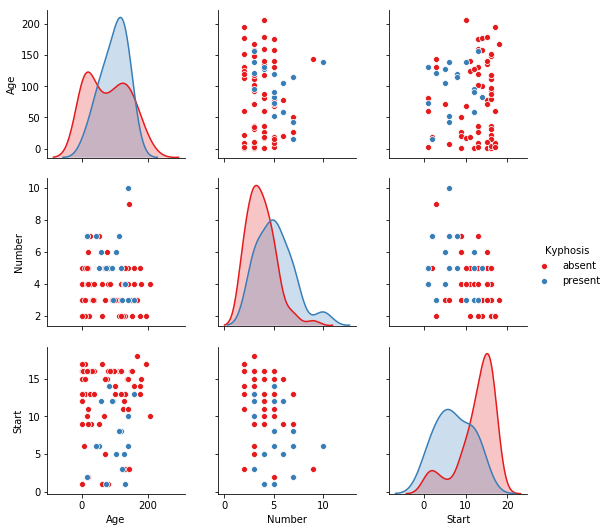

In [11]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [86]:
print(X_train[:10])

    Age  Number  Start
78  120       2     13
43   61       4      1
73  206       4     10
68   18       4     11
54  140       4     15
18   80       5     16
35   93       3     16
9    59       6     12
3     2       5      1
32  130       5     13


## Decision Trees

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtree = DecisionTreeClassifier()

In [89]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

In [90]:
predictions = dtree.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.70      0.76        20
     present       0.25      0.40      0.31         5

   micro avg       0.64      0.64      0.64        25
   macro avg       0.54      0.55      0.53        25
weighted avg       0.71      0.64      0.67        25



In [93]:
print(confusion_matrix(y_test,predictions))

[[14  6]
 [ 3  2]]


In [94]:
dtree.feature_importances_

array([0.33005051, 0.13837076, 0.53157874])

## Tree Visualization

In [95]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

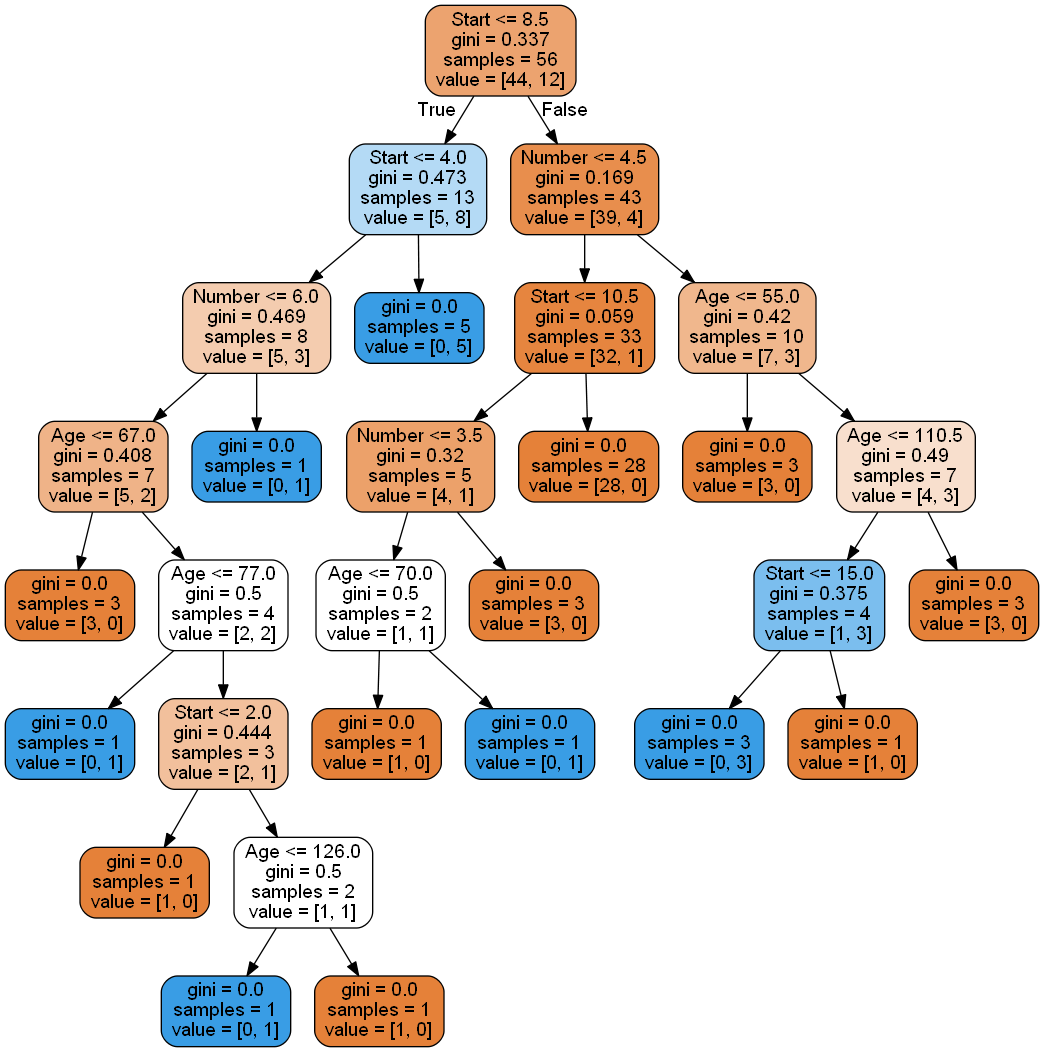

In [96]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,\
                filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
rfc_pred = rfc.predict(X_test)

In [99]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 3  2]]


In [100]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

   micro avg       0.80      0.80      0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [101]:
rfc.predict_proba(X_test)[:5]

array([[0.91, 0.09],
       [0.38, 0.62],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [102]:
rfc.feature_importances_

array([0.33066137, 0.30551244, 0.36382619])